In [14]:
import pandas as pd 
import numpy as np

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [16]:
#datacollection and processing
#loading the csv data pandas dataframe
lung_data =pd.read_csv("survey lung cancer.csv")

In [17]:
#print first five rows of the dataframe
lung_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [18]:
#print last five rows of the data frame
lung_data.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [19]:
#number of rows and columns in the dataset
lung_data.shape

(309, 16)

In [20]:
#getting some info about the data 
lung_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [21]:
#checking for missing values
lung_data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [22]:
#statiscal measures of the data
lung_data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [23]:
lung_data =lung_data.replace(to_replace="YES",value="1")
lung_data =lung_data.replace(to_replace="NO",value="2")

In [51]:
lung_data =lung_data.replace(to_replace="F",value="1")
lung_data =lung_data.replace(to_replace="M",value="2")

In [52]:
lung_data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,2,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,2,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,2
3,2,63,2,2,2,1,1,1,1,1,2,1,1,2,2,2
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,2,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,2,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,2,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [76]:
lung_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,2,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,2,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,2
3,2,63,2,2,2,1,1,1,1,1,2,1,1,2,2,2
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,2


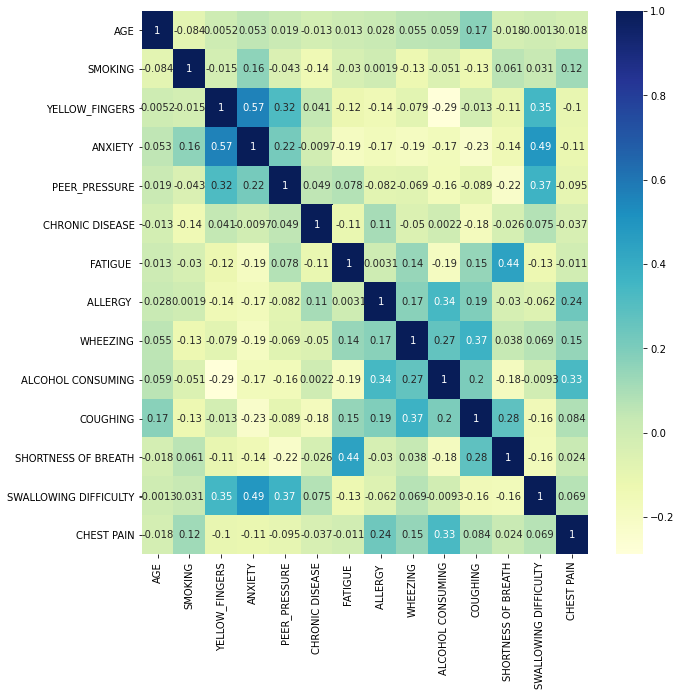

In [53]:
import matplotlib.pyplot as plt
import seaborn as sn
#checking the correlation and visualising using heatmap
corr = lung_data.corr()
features = corr.index
plt.figure(figsize=(10,10))
ax = sn.heatmap(lung_data[features].corr(),annot=True, cmap="YlGnBu")

In [54]:
#checking the distribution of the target variable
# 2 - yes disease
#1 - no disease
lung_data["LUNG_CANCER"].value_counts()

1    270
2     39
Name: LUNG_CANCER, dtype: int64

In [79]:
#splilting the features and target
X = lung_data.drop(columns ='LUNG_CANCER', axis = 1)
Y = lung_data["LUNG_CANCER"]

In [80]:
X

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,2,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,2,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,2,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,2,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,2,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,2,67,2,1,2,1,1,2,2,1,2,2,2,1,2


In [81]:
Y

0      1
1      1
2      2
3      2
4      2
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: object

In [82]:
#splitting the data into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, stratify =Y,random_state = 10)

In [83]:
print(X.shape,X_train.shape,X_test.shape)

(309, 15) (247, 15) (62, 15)


In [84]:
model = LogisticRegression()

In [85]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [86]:
#modelevualtion
from sklearn.metrics import accuracy_score
X_train_predicition = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predicition,Y_train)
print("Accuracy on training data: ", training_data_accuracy)

Accuracy on training data:  0.9190283400809717


In [87]:
#accuracy score on test data
X_test_predicition = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_predicition,Y_test)
print("Accuracy on test data: ", training_data_accuracy)

Accuracy on test data:  0.9190283400809717


In [92]:
#buliding the predictive system
inputdata = (2,69,1,2,2,1,1,2,1,2,2,2,2,2,2)
#change the input data as numpy array
input_to_numpy = np.asarray(inputdata)
#reshape the numpy array as we are predicting only one instance
inputdata_reshape = input_to_numpy.reshape(1,-1)
prediction = model.predict(inputdata_reshape)
print(prediction) 

['1']


/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [97]:
prediction = model.predict(inputdata_reshape)
print(prediction)

if (prediction[0]== 0):
    print('The Person does not have a Lung Cancer')
else:
    print('The Person has Lung Cancer')

['1']
The Person has Lung Cancer


/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
